# Newton Raphson solver in pure Python

First we need to import a few libraries that we will need. 

The first line is specific to using Python in the Jupyter environment. 

The second two lines load the packages we will wish to use. They are comparable to Matlab toolboxes. In computational usage of Python, you almost **always** use these two, perhaps additional libraries as well. 

The last of the 4 lines is loading my code simply so we have a starting point. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp

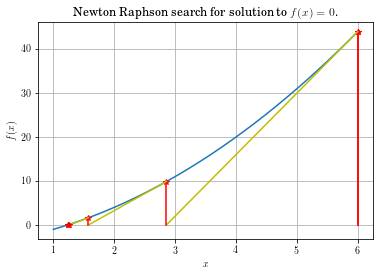

In [2]:
from newton_raphson import newton_raphson_plot
from newton_raphson import myfunc
function_name = 'myfunc'
newton_raphson_plot(function_name,6)
plt.savefig('Newton_Raphson_Solution.svg')  # There is now a file in Scaled Vector Format

If you really want to understand the Jupyter *magics* uncomment the next line. (remove the '#')

In [5]:
# %magic

(1.2360679775000651, -9.171621755329502e-07)

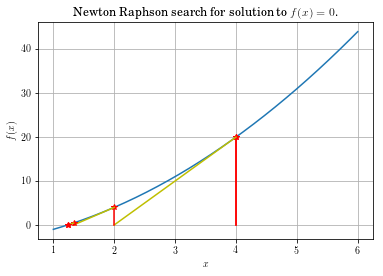

In [4]:
# The last line in a cell dumps all output to the page. Here we get the answer (1.236)!
newton_raphson_plot(function_name, x0=4)

Let's put the plots in a GUI. 

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


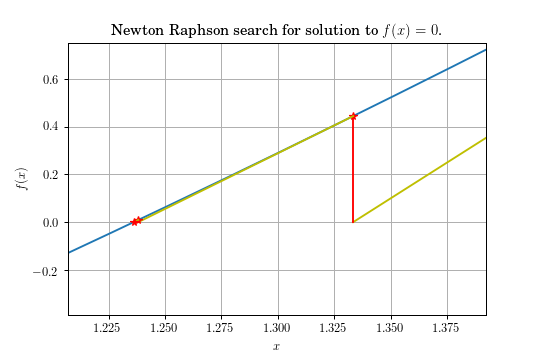

(1.2360679775000651, -9.171621755329502e-07)

In [6]:
newton_raphson_plot(function_name, x0=4)
## For higher quality, uncomment below. 
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')

So, how is this done? Let's start by defining a *function*, or *subroutine*, etc.

In [7]:
def myfunc(x):
    return x**2+2*x-4

The word *def* takes the place of *function* in Matlab. The colon, ":", ends the line. All other lines are indented a single level. [Standard](https://www.python.org/dev/peps/pep-0008/) formating defined this as 4 spaces. 

* Most editors will move to four spaces is you use the *Tab* key. 
* [Standard](https://www.python.org/dev/peps/pep-0008/) for formatting are considered a big deal. 
    * You won't remember them.
    * A good editor (Spyder, PyCharm, Atom) will remember them.
    * They substantially enhance readability.
    * Many editors will make this happen for you automatically on save. 

In [8]:
function_name = 'myfunc'

Plots are done similarly to Matlab. 
* We optioned here, for our sanity, to control the *name space*
* The name *ylabel* **can still be used as a variable**!

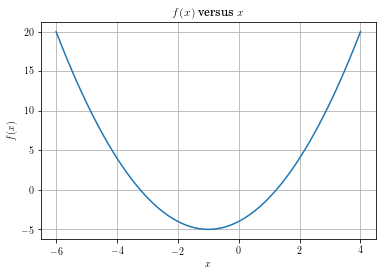

In [11]:
%matplotlib inline
x = sp.linspace(start = -6, stop= 4, num = 200)
plt.plot(x,myfunc(x))
plt.grid('on')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('$f(x)$ versus $x$')
plt.show()
# To save a plot
plt.savefig('myplot.pdf')

In [12]:
ylabel = 4
ylabel

4

In [26]:
def newton_raphson(function, x0 = 0, dx = 1e-10, eps = 1e-10):
    deltax = 2*eps
    count = 0
    x = x0
    # loop until it converges, but no more than 50 times
    while abs(deltax) > eps and count < 50: 
        count += 1 # I can add 1 to the variable *count*. Neat Python shortcut. 
        # This is a comment
        # The next line is "Matlab style" and *bad*
        #f = eval(function + '('+ str(x) + ')')
        f = globals()[function](x)  #We explain later. 
        #f2 = eval(function + '('+ str(x+dx) + ')')
        f2 = globals()[function](x+dx)
        # Calculate the slope (estimation of derivative. )
        dfdx = (f2-f)/dx
        # Straight line approximation of delta x to intercept y=0. 
        deltax = -f/dfdx
        # New estimate of x. 
        x = x + deltax
    return x, deltax                

In [27]:
%%timeit #just clocking this
newton_raphson(function_name, x0=2)

The slowest run took 6.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.6 µs per loop


In [29]:
# less efficient- using the eval statement
def newton_raphson_eval(function, x0 = 0, dx = 1e-10, eps = 1e-10):
    deltax = 2*eps
    count = 0
    x = x0
    while abs(deltax) > eps and count < 50:
        count += 1
        f = eval(function + '('+ str(x) + ')')
        #f = globals()[function](x)
        f2 = eval(function + '('+ str(x+dx) + ')')
        #f2 = globals()[function](x+dx)
        dfdx = (f2-f)/dx
        deltax = -f/dfdx
        x = x + deltax
    return x, deltax

In [30]:
%%timeit
newton_raphson_eval(function_name, x0=2)

1000 loops, best of 3: 155 µs per loop


In [31]:
import scipy.optimize

In [32]:
%%timeit
scipy.optimize.broyden1(globals()[function_name], 2, f_tol=1e-14)

100 loops, best of 3: 1.62 ms per loop


In [33]:
%%timeit
scipy.optimize.broyden2(globals()[function_name], 2, f_tol=1e-14)

100 loops, best of 3: 1.72 ms per loop


In [35]:
%%timeit
scipy.optimize.root(globals()[function_name], 2)

10000 loops, best of 3: 76.7 µs per loop


In [36]:
%%timeit
scipy.optimize.fsolve(globals()[function_name], 2)

The slowest run took 4.46 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 74.2 µs per loop


My code is faster. How? Well, the other codes are optimized for very large problems. Mine is optimized for small problems. 

In [12]:
help(scipy.optimize)

Help on package scipy.optimize in scipy:

NAME
    scipy.optimize

DESCRIPTION
    Optimization and root finding (:mod:`scipy.optimize`)
    
    .. currentmodule:: scipy.optimize
    
    Optimization
    
    Local Optimization
    ------------------
    
    .. autosummary::
       :toctree: generated/
    
       minimize - Unified interface for minimizers of multivariate functions
       minimize_scalar - Unified interface for minimizers of univariate functions
       OptimizeResult - The optimization result returned by some optimizers
       OptimizeWarning - The optimization encountered problems
    
    The `minimize` function supports the following methods:
    
    .. toctree::
    
       optimize.minimize-neldermead
       optimize.minimize-powell
       optimize.minimize-cg
       optimize.minimize-bfgs
       optimize.minimize-newtoncg
       optimize.minimize-lbfgsb
       optimize.minimize-tnc
       optimize.minimize-cobyla
       optimize.minimize-slsqp
       optimiz

In [145]:
dir(scipy.optimize)

['LbfgsInvHessProduct',
 'OptimizeResult',
 'OptimizeWarning',
 'Tester',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_basinhopping',
 '_cobyla',
 '_differentialevolution',
 '_group_columns',
 '_hungarian',
 '_lbfgsb',
 '_linprog',
 '_lsq',
 '_minimize',
 '_minpack',
 '_nnls',
 '_numdiff',
 '_root',
 '_slsqp',
 '_spectral',
 '_trustregion',
 '_trustregion_dogleg',
 '_trustregion_ncg',
 '_zeros',
 'absolute_import',
 'anderson',
 'approx_fprime',
 'basinhopping',
 'bench',
 'bisect',
 'bracket',
 'brent',
 'brenth',
 'brentq',
 'broyden1',
 'broyden2',
 'brute',
 'check_grad',
 'cobyla',
 'curve_fit',
 'diagbroyden',
 'differential_evolution',
 'division',
 'excitingmixing',
 'fixed_point',
 'fmin',
 'fmin_bfgs',
 'fmin_cg',
 'fmin_cobyla',
 'fmin_l_bfgs_b',
 'fmin_ncg',
 'fmin_powell',
 'fmin_slsqp',
 'fmin_tnc',
 'fminbound',
 'fsolve',
 'golden',
 'lbfgsb',
 'least_squares',
 'leastsq',
 

In [39]:
globals()

{'In': ['',
  "get_ipython().magic('matplotlib inline')\nimport matplotlib.pyplot as plt\nimport scipy as sp",
  "from newton_raphson import newton_raphson_plot\nfrom newton_raphson import myfunc\nfunction_name = 'myfunc'\nnewton_raphson_plot(function_name,6)\nplt.savefig('Newton_Raphson_Solution.svg')  # There is now a file in Scaled Vector Format",
  'newton_raphson_plot(function_name, x0=4)',
  '# The last line in a cell dumps all output to the page. Here we get the answer (1.236)!\nnewton_raphson_plot(function_name, x0=4)',
  "get_ipython().magic('matplotlib notebook')\nnewton_raphson_plot(function_name, x0=4)\n## For higher quality, uncomment below. \n#from IPython.display import set_matplotlib_formats\n#set_matplotlib_formats('pdf', 'svg')",
  "get_ipython().magic('matplotlib qt')\nnewton_raphson_plot(function_name, x0=4)\n## For higher quality, uncomment below. \n#from IPython.display import set_matplotlib_formats\n#set_matplotlib_formats('pdf', 'svg')",
  'def myfunc(x):\n    r

In [38]:
globals()[function_name]

<function __main__.myfunc>

In [41]:
locals()[function_name]

<function __main__.myfunc>